In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load datasets
true_news = pd.read_csv(r"C:\Users\A2Z\Downloads\True.csv\True.csv") 
fake_news = pd.read_csv(r"C:\Users\A2Z\Downloads\Fake.csv\Fake.csv") 


In [3]:
# Step 2: Add labels
min_size = min(len(true_news), len(fake_news))
true_news['label'] = 0
fake_news['label'] = 1

# Step 3: Combine datasets
data = pd.concat([true_news, fake_news], ignore_index=True)

# Step 4: Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data = data.sample(10000, random_state=42)
# Step 5: Select relevant columns
data = data[['text', 'label']]

In [4]:
# Step 6: Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, maxlen=150, truncating='post', padding='post')


# Step 7: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, data['label'], test_size=0.2, random_state=42
)

 


In [5]:
# Step 8: Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=300),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


# Step 9: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 10: Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128
)

C:\Users\A2Z\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 519ms/step - accuracy: 0.5733 - loss: 0.6674 - val_accuracy: 0.8655 - val_loss: 0.3388
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 546ms/step - accuracy: 0.9022 - loss: 0.2979 - val_accuracy: 0.9080 - val_loss: 0.2761
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 551ms/step - accuracy: 0.9221 - loss: 0.2446 - val_accuracy: 0.9225 - val_loss: 0.2636
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 607ms/step - accuracy: 0.9064 - loss: 0.3082 - val_accuracy: 0.9105 - val_loss: 0.2832
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 608ms/step - accuracy: 0.9112 - loss: 0.2875 - val_accuracy: 0.9165 - val_loss: 0.2793
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 484ms/step - accuracy: 0.9092 - loss: 0.3013 - val_accuracy: 0.9165 - val_loss: 0.2678
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 571ms/step - accuracy: 0.9175 - loss: 0.2624 - val_accuracy: 0.9160 - val_loss: 0.2617
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 518ms/step - accuracy: 0.8854 - loss: 0.2820 - val_accu

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9814 - loss: 0.1951
Test Accuracy: 0.98


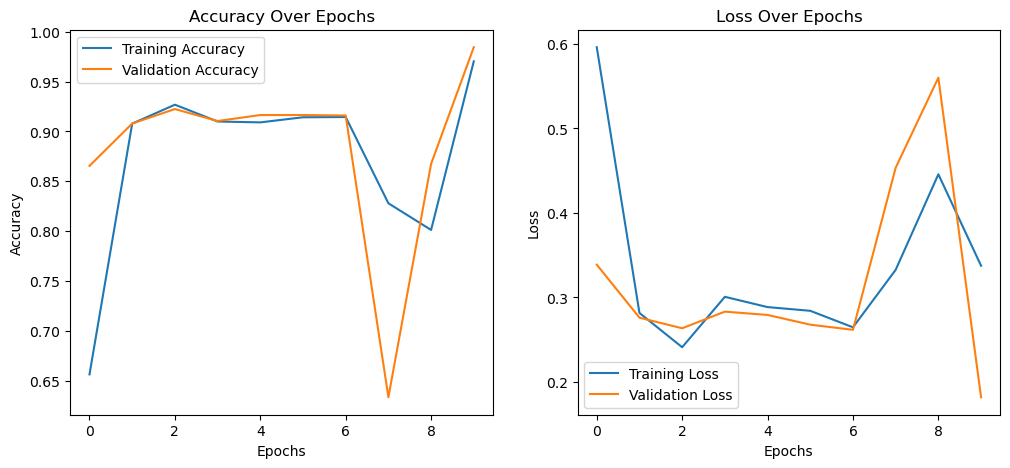

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
Text: NASA successfully lands rover on Mars, begins exploration.
Prediction: Fake News

Text: Breaking: Scientists claim Earth is flat, reveal evidence!
Prediction: Fake News



In [6]:
# Step 11: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 12: Visualize training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 13: Predict on custom inputs
custom_texts = [
     "NASA successfully lands rover on Mars, begins exploration.",
    "Breaking: Scientists claim Earth is flat, reveal evidence!"
]

custom_sequences = tokenizer.texts_to_sequences(custom_texts)
custom_padded = pad_sequences(custom_sequences, maxlen=300, truncating='post', padding='post')
predictions = model.predict(custom_padded)

for i, text in enumerate(custom_texts):
    label = "Fake News" if predictions[i] > 0.5 else "True News"
    print(f"Text: {text}\nPrediction: {label}\n")